In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from tensorflow.keras import models, layers, regularizers, metrics
from sklearn.model_selection import train_test_split
from sklearn import metrics as met
from imblearn.over_sampling import SMOTE


In [35]:
# loading
y = np.genfromtxt('./data/label_deprment_encoded.csv',delimiter=',')

In [36]:
X = np.genfromtxt('./data/features_deprment_encoded.csv',delimiter=',')

In [37]:
#splitting
x_train, x_val, y_train, y_val = train_test_split(X,
                                                 y,
                                                 test_size = .2,
                                                 random_state=12)

In [38]:
# resampling the traninging data to change the balnce the data
sm = SMOTE(random_state=12)
x_res, y_res = sm.fit_sample(x_train, y_train)

In [39]:
# turning the array to tensors
y_train_res = tf.convert_to_tensor(y_res, dtype='float32')
x_train_res = tf.convert_to_tensor(x_res, dtype='float32')

In [40]:
X_val = tf.convert_to_tensor(x_val, dtype='float32')
Y_val = tf.convert_to_tensor(y_val, dtype='float32')

In [41]:
# makeing the tensorflow data 
data_train = tf.data.Dataset.from_tensor_slices(
    (x_train_res, y_train_res)

).cache()

data_validate = tf.data.Dataset.from_tensor_slices(
    (X_val, Y_val)).cache()

In [42]:
metrics.AUC


tensorflow.python.keras.metrics.AUC

In [43]:
X[0].shape

(10,)

In [56]:
model = models.Sequential()
model.add(layers.Flatten(input_shape=(10, 1, 1)))
model.add(layers.Dense(10, activation=tf.keras.layers.LeakyReLU(alpha=0.1)))
model.add(layers.Dense(5, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.summary()


model.compile(optimizer='nadam', loss='binary_crossentropy', metrics=['accuracy'])

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_8 (Flatten)          (None, 10)                0         
_________________________________________________________________
dense_23 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_24 (Dense)             (None, 5)                 55        
_________________________________________________________________
dense_25 (Dense)             (None, 1)                 6         
Total params: 171
Trainable params: 171
Non-trainable params: 0
_________________________________________________________________


In [57]:
history = model.fit(data_train.shuffle(10000).batch(32), epochs=30, validation_data=data_validate.batch(32))

Epoch 1/30
574/574 [==============================] - 1s 2ms/step - loss: 0.6754 - accuracy: 0.6133 - val_loss: 0.6741 - val_accuracy: 0.5497
Epoch 2/30
574/574 [==============================] - 1s 1ms/step - loss: 0.5614 - accuracy: 0.7623 - val_loss: 0.5062 - val_accuracy: 0.7530
Epoch 3/30
574/574 [==============================] - 1s 2ms/step - loss: 0.4097 - accuracy: 0.8365 - val_loss: 0.4198 - val_accuracy: 0.7817
Epoch 4/30
574/574 [==============================] - 1s 1ms/step - loss: 0.3257 - accuracy: 0.8690 - val_loss: 0.3942 - val_accuracy: 0.8047
Epoch 5/30
574/574 [==============================] - 1s 1ms/step - loss: 0.2851 - accuracy: 0.8925 - val_loss: 0.3365 - val_accuracy: 0.8423
Epoch 6/30
574/574 [==============================] - 1s 2ms/step - loss: 0.2581 - accuracy: 0.9073 - val_loss: 0.2966 - val_accuracy: 0.8687
Epoch 7/30
574/574 [==============================] - 1s 2ms/step - loss: 0.2423 - accuracy: 0.9128 - val_loss: 0.2720 - val_accuracy: 0.8800
Epoch 

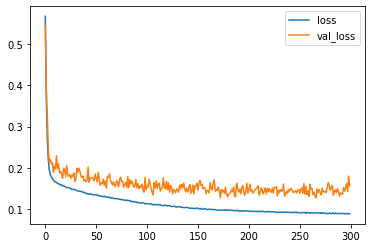

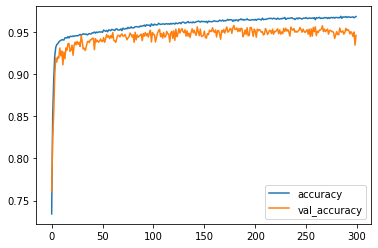

In [13]:
plt.plot(model.history.history['loss'], label='loss')
plt.plot(model.history.history['val_loss'], label='val_loss')
plt.legend()
plt.show()
plt.close()

plt.plot(model.history.history['accuracy'], label='accuracy')
plt.plot(model.history.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.show()
plt.close()

In [14]:
np.hstack([model.predict(X_val), Y_val[:,np.newaxis]])

array([[1.5577674e-04, 0.0000000e+00],
       [9.9743724e-01, 1.0000000e+00],
       [1.4424999e-06, 0.0000000e+00],
       ...,
       [1.0777712e-03, 0.0000000e+00],
       [8.0373591e-01, 1.0000000e+00],
       [9.8823822e-01, 1.0000000e+00]], dtype=float32)

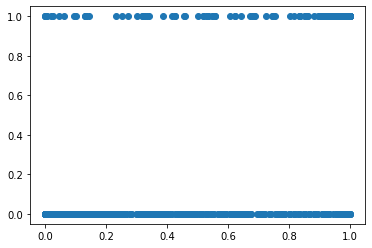

In [15]:
plt.scatter(model.predict(X_val), Y_val)

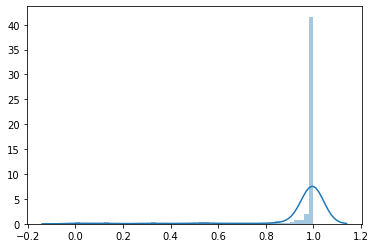

In [16]:
sns.distplot(model.predict(X_val)[Y_val==1])

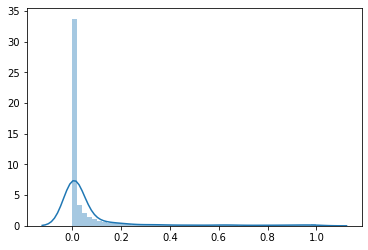

In [17]:
sns.distplot(model.predict(X_val)[Y_val==0])

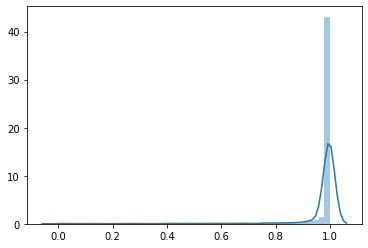

In [18]:
sns.distplot(model.predict(x_train_res)[y_train_res==1])

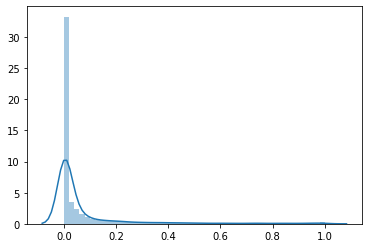

In [19]:
sns.distplot(model.predict(x_train_res)[y_train_res==0])

In [20]:
#roc auc
met.roc_auc_score(Y_val,model.predict(X_val))

0.9866389746816137